In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

Dataset is downloaded from here: https://www.kaggle.com/datasets/aryanfelix/bangalore-housing-prices

In [3]:
from google.colab import files
uploaded = files.upload()

Saving BHP.csv to BHP.csv


Data Load: Load banglore home prices into a dataframe

In [4]:
df = pd.read_csv('BHP.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


##**EDA**

In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df.drop(['area_type','availability', 'society'], axis=1, inplace=True)

In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


Data Cleaning: Handle NA values

In [10]:
df.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [11]:
df_clnd =  df.balcony.fillna(0)

In [12]:
df_clnd = df.dropna()
df_clnd

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [13]:
df_clnd.isna().sum()

,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


## **Feature Engineering**

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [14]:
df_clnd['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [15]:
df_clnd['bhk'] = df_clnd['size'].apply(lambda x: int(x.split(' ')[0]))
df_clnd

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [16]:
df_clnd['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [17]:
df_clnd[df_clnd['bhk']>10]

,location,size,total_sqft,bath,balcony,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
9935,1Hoysalanagar,13 BHK,5425,13.0,0.0,275.0,13


Explore total_sqft feature

In [18]:
df_clnd['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def isFloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [20]:
sqft = df_clnd[~df_clnd['total_sqft'].apply(isFloat)]
sqft

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [21]:
sqft['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '1120 - 1145',
       '3090 - 5002', '1160 - 1195', '1000Sq. Meter', '1115 - 1130',
       '520 - 645', '1000 - 1285', '650 - 665', '633 - 666', '5.31Acres',
       '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '716Sq. Meter', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '3040Sq. Meter', '500Sq. Yards', '2806 - 3019',
       '613 - 648', '704 - 730', '1210 - 1477', '3369 - 3464',
       '1125 - 1500', '167Sq. Meter', '1076 - 1199', '381 - 535',
       '524 - 894', '540 - 670', '2725 - 3

Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [22]:
def convert_sqft_to_num(x):
  tokens = x.split('-')

  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2

  try:
    return float(x)

  except:
    return None

In [23]:
df_clnd.total_sqft = df_clnd.total_sqft.apply(convert_sqft_to_num)
df_clnd

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [24]:
df_clnd['price_per_sqft'] = df_clnd['price']*100000/df_clnd['total_sqft']
df_clnd

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [25]:
len(df.location.unique())

1306

In [26]:
location_counts = df_clnd.location.value_counts()
location_counts

,count
location,
Whitefield,514
Sarjapur Road,372
Electronic City,300
Kanakpura Road,261
Thanisandra,231
...,...
Gulakamale,1
Duddanahalli,1
Doddanakunte,1


##**Dimensionality Reduction**




Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [27]:
locLessThan10=location_counts[location_counts < 10]
locLessThan10

,count
location,
2nd Phase JP Nagar,9
Nagadevanahalli,9
Kaverappa Layout,9
Chandra Layout,9
Gollahalli,9
...,...
Gulakamale,1
Duddanahalli,1
Doddanakunte,1


In [28]:
df_clnd['location'] = df_clnd['location'].apply(
    lambda x: 'other' if x in locLessThan10 else x
)
df_clnd.location.value_counts()

,count
location,
other,2654
Whitefield,514
Sarjapur Road,372
Electronic City,300
Kanakpura Road,261
...,...
Basapura,10
Kalkere,10
1st Block Koramangala,10


In [29]:
len(df_clnd['location'].unique())

248

In [30]:
df_clnd.duplicated().sum()

np.int64(819)

In [31]:
df_clnd.drop_duplicates(inplace=True)
df_clnd.duplicated().sum()

np.int64(0)

In [32]:
df_clnd.shape

(11891, 8)

##**Outlier Removal Using Business Logic**

As a data scientist when we have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [33]:
df_clnd[df_clnd['total_sqft']/df_clnd['bhk']<300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13216,other,1 BHK,250.0,2.0,2.0,40.0,1,16000.000000
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091


In [34]:
df_clnd = df_clnd[~(df_clnd['total_sqft']/df_clnd['bhk']<300)]
df_clnd.shape

(11253, 8)

In [35]:
df_clnd.price_per_sqft.describe()

,price_per_sqft
count,11212.000000
mean,6292.460584
std,4078.764127
min,267.829813
25%,4238.827380
50%,5301.032209
75%,6902.134305
max,176470.588235


In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()

    # Group data by location
    for key, subdf in df.groupby('location'):

        # Calculate mean and standard deviation of price_per_sqft
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        # Keep data within mean ± 1 standard deviation
        reduced_df = subdf[
            (subdf.price_per_sqft > (m - st)) &
            (subdf.price_per_sqft <= (m + st))
        ]

        # Append cleaned data
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    return df_out


In [37]:
newDf = remove_pps_outliers(df_clnd)
newDf.shape

(9144, 8)

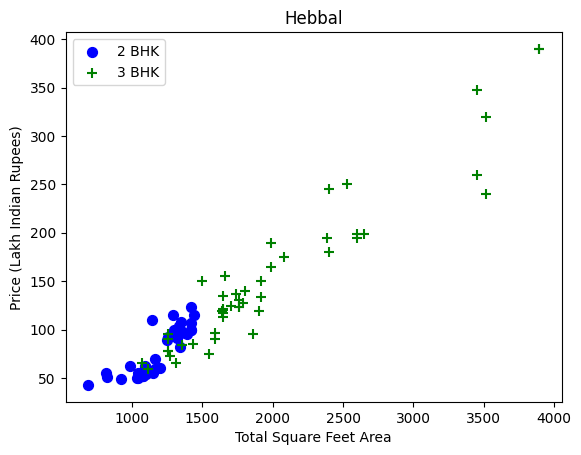

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(newDf,"Hebbal")

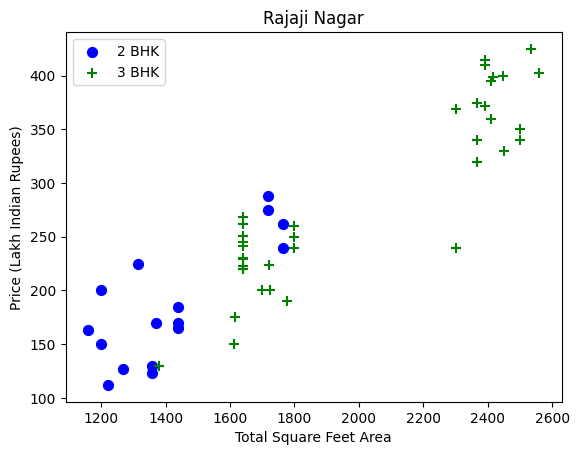

In [39]:
plot_scatter_chart(newDf,"Rajaji Nagar")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.


{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },

    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [41]:
newDf = remove_bhk_outliers(newDf)
newDf

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...,...
9133,other,2 BHK,1650.0,1.0,1.0,130.0,2,7878.787879
9136,other,2 BHK,1155.0,2.0,1.0,64.0,2,5541.125541
9138,other,2 BHK,1200.0,2.0,3.0,70.0,2,5833.333333
9139,other,1 BHK,1800.0,1.0,1.0,200.0,1,11111.111111


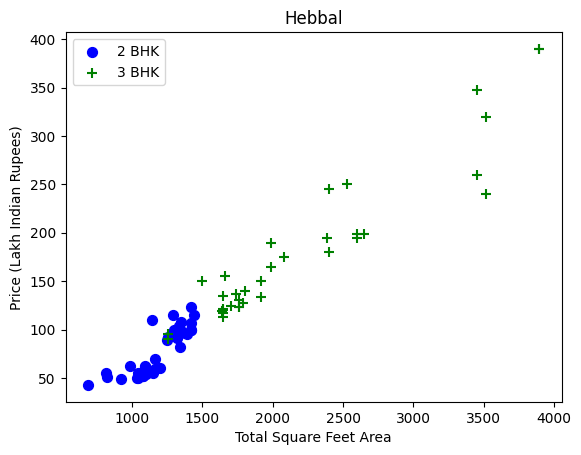

In [42]:
plot_scatter_chart(newDf,"Hebbal")

Text(0, 0.5, 'Count')

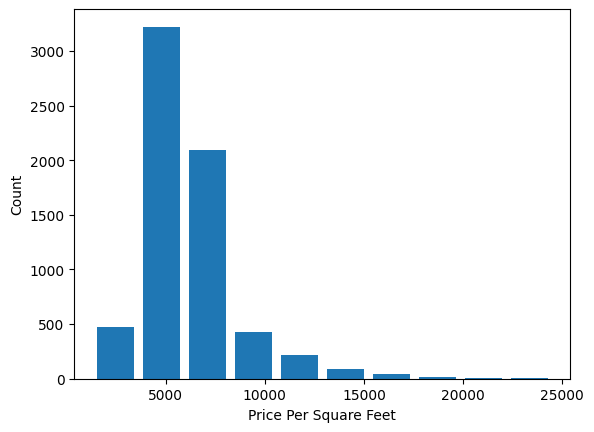

In [43]:
import matplotlib
plt.hist(newDf.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [44]:
newDf['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

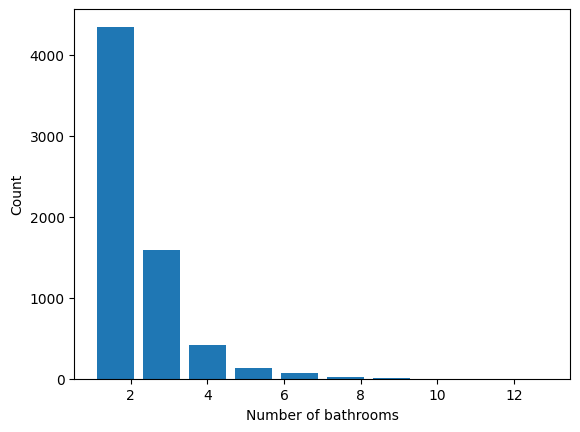

In [45]:
plt.hist(newDf.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [46]:
newDf[newDf['bath']>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
8627,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Outlier Removal Using Bathrooms Feature

Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [47]:
newDf = newDf[newDf.bath<newDf.bath+2]
newDf.shape

(6586, 8)

In [48]:
dfCleaned = newDf.drop(['size', 'price_per_sqft'], axis=1)
dfCleaned

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2
...,...,...,...,...,...,...
9133,other,1650.0,1.0,1.0,130.0,2
9136,other,1155.0,2.0,1.0,64.0,2
9138,other,1200.0,2.0,3.0,70.0,2
9139,other,1800.0,1.0,1.0,200.0,1


Use One Hot Encoding For Location

In [49]:
dummies = pd.get_dummies(dfCleaned['location'])
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9136,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [50]:
encodedDF = pd.concat([dfCleaned,dummies.drop('other',axis='columns')],axis='columns')
encodedDF

,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9133,other,1650.0,1.0,1.0,130.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9136,other,1155.0,2.0,1.0,64.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9138,other,1200.0,2.0,3.0,70.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9139,other,1800.0,1.0,1.0,200.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Build a Model Now...

In [51]:
X = encodedDF.drop(['location','price'],axis='columns')
X

,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9133,1650.0,1.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9136,1155.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9138,1200.0,2.0,3.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9139,1800.0,1.0,1.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
y = encodedDF.price
y

,price
1,40.0
2,83.0
3,40.0
4,65.0
5,43.0
...,...
9133,130.0
9136,64.0
9138,70.0
9139,200.0


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

lr_clf_model = LinearRegression()

In [56]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(lr_clf_model, X, y, cv=cv)

array([0.85014485, 0.78101897, 0.87961077, 0.87398602, 0.84083087])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

Find best model using GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.845118,{'fit_intercept': True}
1,lasso,0.698069,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.697073,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [58]:
lr_clf_model.fit(X_train,y_train)
lr_clf_model.score(X_test,y_test)

0.7974948914625039

Test the model for few properties

In [59]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf_model.predict([x])[0]

In [60]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

np.float64(97.85799582700983)

In [61]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

np.float64(103.1459621860641)

In [62]:
predict_price('Indira Nagar',1000, 2, 2)

np.float64(162.63878417759602)

In [63]:
predict_price('Indira Nagar',1000, 3, 3)

np.float64(167.9267505366503)

Export the tested model to a pickle file

In [64]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf_model,f)

Export location and column information to a file that will be useful later on in our prediction application

In [65]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))